In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [50]:
# PARQUET_PATH = Path("../Dane/chembl_activity_subset_01.parquet")
PARQUET_PATH = ("../Dane/chembl_activity_cleaned_00.parquet")

In [51]:
df = pd.read_parquet(PARQUET_PATH)

In [52]:
print(df.head())

   activity_id  assay_id  doc_id  record_id  molregno standard_relation  \
0        32233     44517    5951     251326    179188                 =   
1        32234     44520    5951     251326    179188                 =   
2        32249    106820    6217      35595     33632                 =   
3        32251    106820    6217      35591     33415                 =   
4        32252    106815    6217      35591     33415                 =   

   standard_value standard_units  standard_flag standard_type  ...  \
0            63.0             nM              1          EC50  ...   
1             6.4             nM              1          EC50  ...   
2             9.0             nM              1          EC50  ...   
3             7.0             nM              1          EC50  ...   
4          1330.0             nM              1          EC50  ...   

   text_value  standard_text_value confidence_score  \
0         NaN                  NaN                8   
1         NaN     

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468537 entries, 0 to 468536
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   activity_id           468537 non-null  int64  
 1   assay_id              468537 non-null  int64  
 2   doc_id                468537 non-null  int64  
 3   record_id             468537 non-null  int64  
 4   molregno              468537 non-null  int64  
 5   standard_relation     463956 non-null  object 
 6   standard_value        468537 non-null  float64
 7   standard_units        468320 non-null  object 
 8   standard_flag         468537 non-null  int64  
 9   standard_type         468537 non-null  object 
 10  potential_duplicate   468537 non-null  int64  
 11  pchembl_value         363986 non-null  float64
 12  bao_endpoint          468537 non-null  object 
 13  uo_units              468199 non-null  object 
 14  qudt_units            468115 non-null  object 
 15  

In [54]:
print(df.describe())

        activity_id      assay_id         doc_id     record_id      molregno  \
count  4.685370e+05  4.685370e+05  468537.000000  4.685370e+05  4.685370e+05   
mean   8.047263e+06  8.319438e+05   52320.203698  1.383546e+06  1.017653e+06   
std    9.623284e+06  8.500288e+05   44674.005031  1.461879e+06  1.035786e+06   
min    3.186300e+04  1.700000e+01       2.000000  2.100000e+01  1.000000e+01   
25%    9.651890e+05  1.584480e+05   14434.000000  2.482830e+05  2.077780e+05   
50%    1.882341e+06  4.365800e+05   35792.000000  6.384770e+05  3.994380e+05   
75%    1.658868e+07  1.578109e+06   99276.000000  2.777046e+06  1.963648e+06   
max    2.902344e+07  2.596719e+06  135867.000000  4.641617e+06  3.283446e+06   

       standard_value  standard_flag  potential_duplicate  pchembl_value  \
count    4.685370e+05  468537.000000             468537.0  363986.000000   
mean     9.101837e+12       0.998973                  0.0       6.696632   
std      3.397582e+15       0.032024               

In [55]:
print(df.isnull().sum())

activity_id                  0
assay_id                     0
doc_id                       0
record_id                    0
molregno                     0
standard_relation         4581
standard_value               0
standard_units             217
standard_flag                0
standard_type                0
potential_duplicate          0
pchembl_value           104551
bao_endpoint                 0
uo_units                   338
qudt_units                 422
toid                    468537
upper_value             467492
standard_upper_value    468537
src_id                       0
type                         0
relation                  4378
value                        0
units                    30954
text_value              468537
standard_text_value     468537
confidence_score             0
canonical_smiles             0
mw_freebase                  0
alogp                    19270
hbd                      19270
hba                      19270
psa                      19270
heavy_at

In [56]:
print("Liczba rekordów:", len(df))
print("Unikalne związki:", df["canonical_smiles"].nunique())
print("Typy aktywności:", df["standard_type"].unique())

Liczba rekordów: 468537
Unikalne związki: 264053
Typy aktywności: ['EC50' 'IC50']


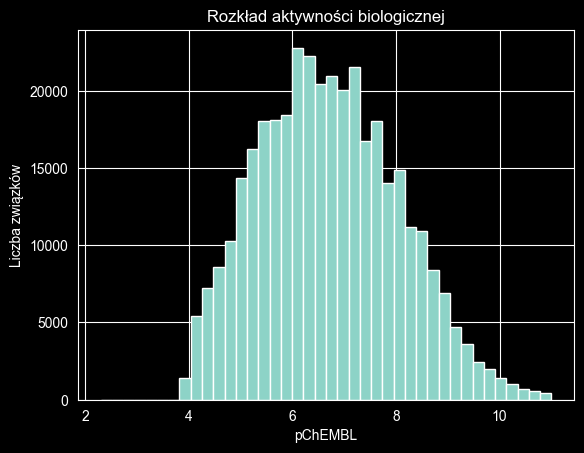

In [57]:
plt.figure()
df["pchembl_value"].hist(bins=40)
plt.xlabel("pChEMBL")
plt.ylabel("Liczba związków")
plt.title("Rozkład aktywności biologicznej")
plt.show()

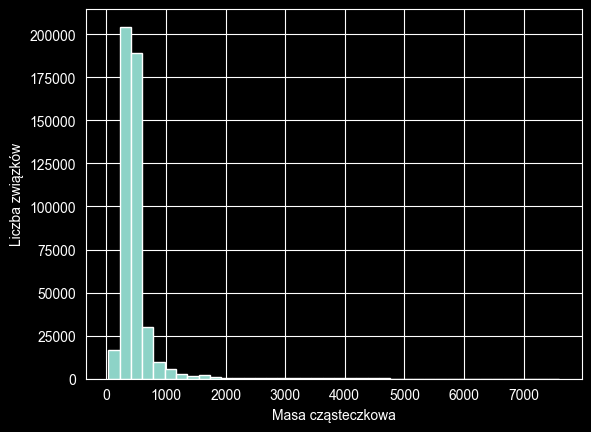

In [58]:
plt.figure()
df["mw_freebase"].hist(bins=40)
plt.xlabel("Masa cząsteczkowa")
plt.ylabel("Liczba związków")
plt.show()

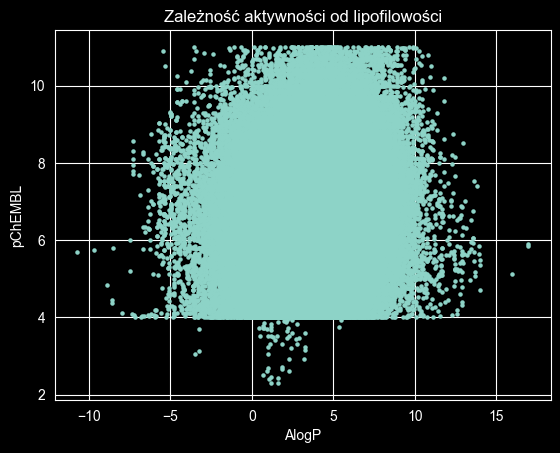

In [59]:
plt.figure()
plt.scatter(df["alogp"], df["pchembl_value"], s=5)
plt.xlabel("AlogP")
plt.ylabel("pChEMBL")
plt.title("Zależność aktywności od lipofilowości")
plt.show()

In [60]:
# jakość danych
print(df["confidence_score"].value_counts())

confidence_score
9    284208
8    170624
7     13705
Name: count, dtype: int64
